# Hypothetical Business Context:

#### I have chosen to work for an export oriented manufacturing enterprise. The company involves itself in selling its product range to various countries and catering to variety of market segments, i.e. category of buyers.
#### Data: The company has sales and profitability data for two years, 2013 and 2014. The data comprises of dates of sales made, number of units sold, country the sale was made in, segment that the buyer belonged to, discounts applied, manufacturing price of the product, cost of sales (cost of goods sold), sale value, profit etc.
#### Need for a data scientist for data analysis: The company wishes to streamline its decision making process in terms of logistics expansion, marketing campaigns, product pricing, hiring of staff and important strategic management decisions. In order to do this, the company wishes to acquire a data driven approach and work according to the market feedback received by it, which is why they have hired me as a data scientist to derive meaningful inferencess from their sales data to answer important organisational decision questions.
#### The dataset we will be analysing has been taken from the opensource website kaggle, at the following url -- (https://www.kaggle.com/datasets/atharvaarya25/financials/data).

# Importing the libraries



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Loading the dataset

In [ ]:
df = pd.read_csv("Financials.csv")

## Visually checking our dataset columns:
### In order to see all the columns of our dataset (which are 16 as we already know) we will set maximum number of columns displayed to a high enough number so that python doesn't skip out on some columns.

In [ ]:
pd.set_option('display.max_columns', 50)

# Data Exploration:

In [ ]:
print(df.head())
print(df.tail())
print(df.shape)
print(df.dtypes)
print(df.columns)

      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00    $16,185.00   01

## Checking if our data contains duplicated values:

In [ ]:
print(df.duplicated().sum())

0


## Checking if our data contains null values:

In [ ]:
print(df.isnull().sum())

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64


## Data Exploration insights:
### 1) We can right away see the problem of leading and trailing spaces in our column names. This will make working with the data very difficult later on and we might want to remove these spaces from our column titles. Let us do the same here.
### 2) We can also see from the names of our columns and what they represent (as per my own domain knowledge in finance), that the columns 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS' and 'Profit' are actually numeric columns, i.e. they contain numerical information but are categorized as objects here in our dataframe, we will need to fix this.
### 3) We can see that some columns have commas, '$' signs and '-' in their instances and these will need to be removed from numeric columns because python will not be able to run numeric functions like finding sums or averages on these columns as such. We would like to run these functions to analyse our data and find meaningful results for questions posed by our company.
### 4) We can see that our data has categorical columns of 'Segment', 'Country', 'Product' and 'Discount Band' which basically compartmentalise our numeric data. These are categories in which we can divide our numerical data, for ex. 'Sales' can be differentiated as per the different countries the products are sold in (from 'Country' column) or as per market segments ('Segment' column) or as per different products ('Product' column). We will try to figure out ways to do differential analysis for the categories mentioned here and try to get meaningful inferences from such analysis to answer the questions posed to us.
### 5) We can also see that the column of 'Date' gives us the dates of sales made and it can be useful for us to make a plotting analysis later on. We would therefore like to convert this column type to 'datetime' format.
### 6) Identifying and eliminating duplicates is essential to perform a meaningful data analysis and answer questions, but our dataset contains no uplicates, so there's no need to eliminate duplicates in our dataset.
### 7) Our data doesn't have any null values either, which is very good news as replacing null values could be a very time consuming task, especially if we want to replace them with values that make sense to specific domains and not just random central tendency values.
### 8) From our domain knowledge, we know that 'COGS' means Cost of goods sold, i.e. the amount of expense the company had to incur for one particular sale.
### 9) From our domain knowledge, we can deduce that Gross Sales = Sale Price * Units Sold, this is also evident by looking at row 0 in our dataset head, 32370 (Gross Sales) = 20 (Sale Price) * 1618.50 (Units Sold)
### 10) We can also see from the tail of our dataset that Sales = Gross Sales - Discounts, as evident from row number 698:- 5,061 (Gross Sales) - 759.15 (Discounts) = 4301.85 (Sales). This means that 'Discounts' are deducted from 'Sales' wherever discounts are offered.
### 11) Our data also has columns 'Year', 'Month number' and 'Month name'. This gives us more room to analyse our sales data and profitability on the basis of months or year.
### 12) We can describe our columns as such, in layman terms:
####  1)Segment - Market segment where the sale was made
####  2)Country - Country where the sale was made
####  3)Product - The product whose sale was made
####  4)Discount Band - Discount band applied on the sale
####  5)Units Sold - Number of units of the product sold
####  6)Manufacturing Price - Price of making one unit of the product
####  7)Sale Price - Price offered for buying one unit of product
####  8)Gross Sales - Sale Price multiplied by Units Sold
####  9)Discounts - Total monetary value of discount offered on sale
####  10)Sales - Gross Sales minus Discounts
####  11)COGS - Cost of Goods sold
####  12)Profit - Sales minus COGS
####  13)Date - Date of sale made
####  14)Month Number - Month when sale made (number - between 1 and 12)
####  15)Month Name - Month when sale made (name of month)
####  16)Year - Year when the sale was made




# Data Preprocessing

### We will follow our insights gained from data exploration to apply some preprocessing steps and make data more manageale to work with. We will also use some common data cleaning techniques here.


## Removing leading and trailing spaces from column names:

In [ ]:
df.columns = df.columns.str.strip()

## Removing '$' signs, commas and '-' from our numerical columns:
### To do this, first we will separate our numerical columns from the non-numerical ones so that our preprocessing does not affect any important information in non-numeric columns:


In [ ]:
numerical_data = df.columns[4:12]
for columns in numerical_data:
    df[columns] = df[columns].replace({'\$': '', '-': 0, ',': ''}, regex=True)

### We have replaced all '$' signs and ',' with no space, i.e. removed them and at the same time we have replaced '-' with '0' as from looking at the first few rows of the dataset, it's clear that '-' are used only where there is no value to show.


## Now we will convert these columns into numeric type by appying a simple transformation:

In [ ]:
df[numerical_data] = df[numerical_data].apply(pd.to_numeric, errors='coerce')

## We shall now convert our 'Date' column to datetime format:

In [ ]:
df['Date'] = df['Date'].apply(pd.to_datetime)

## We will now check if applying this transformation has accidentally left null values in some instances in columns or not:

In [ ]:
print(df.isnull().sum())
print(df.dtypes)

Segment                 0
Country                 0
Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
Sales                   0
COGS                    0
Profit                 58
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64
Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Y

### We can see that somehow, after our transformation, 58 values in the column 'Profit' turned out to be null.
## We will first see where these nulls are occuring:

In [ ]:
df_null_check = df[df['Profit'].isna()]
print(df_null_check.head())

        Segment                   Country    Product Discount Band  \
232  Enterprise  United States of America   Montana        Medium    
237  Enterprise  United States of America     Paseo        Medium    
238  Enterprise                    France     Paseo        Medium    
246  Enterprise  United States of America     Paseo        Medium    
247  Enterprise                    France     Paseo        Medium    

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
232      3627.0                  5.0       125.0     453375.0   22668.75   
237      2992.0                 10.0       125.0     374000.0   18700.00   
238      2385.0                 10.0       125.0     298125.0   14906.25   
246       861.0                 10.0       125.0     107625.0    5381.25   
247       704.0                 10.0       125.0      88000.0    4400.00   

         Sales      COGS  Profit       Date  Month Number Month Name  Year  
232  430706.25  435240.0     NaN 2014-01-07  

### By domain knowledge intuition, we know that profit is Sales minus all the expenses incurred, here these expenses are 'COGS' (Discounts included, as explained previously). We can see from the null values in profit that they correspond to instances where 'COGS' is more than 'Sales'.
## We will thus replace these null values with the difference between 'Sales' and 'COGS' to correctly identify the loss that the company made on these sales.

In [ ]:
df['Profit'] = df['Profit'].fillna(df['Sales'] - df['COGS'])

## Checking whether we have successfully replaced null values in our dataset:

In [ ]:
print(df.isnull().sum())

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64


##  Now, let's store the unique values in our categorical columns in lists and check them:

In [ ]:
market_segments_list = list(df['Segment'].unique())
country_list = list(df['Country'].unique())
product_list = list(df['Product'].unique())
discount_band_list = list(df['Discount Band'].unique())
month_list = list(df['Month Name'].unique())
year_list = list(df['Year'].unique())


print(market_segments_list)
print(country_list)
print(product_list)
print(discount_band_list)
print(month_list)
print(year_list)

['Government', 'Midmarket', 'Channel Partners', 'Enterprise', 'Small Business']
['Canada', 'Germany', 'France', 'Mexico', 'United States of America']
[' Carretera ', ' Montana ', ' Paseo ', ' Velo ', ' VTT ', ' Amarilla ']
[' None ', ' Low ', ' Medium ', ' High ']
[' January ', ' June ', ' December ', ' March ', ' July ', ' August ', ' September ', ' October ', ' February ', ' November ', ' April ', ' May ']
[2014, 2013]


# Business Questions posed by the company:
## 1) Which Country/ countries should be prioritised for an expansion of sales network infrastructure by the logistics department of the company?

## 2) Which discount bands are the most popular and profitable for each of the products sold by the company?

## 3) Which market segments are the most profitable?
## 4) Which month/ months generated the most amount of sales in the previous years?
## 5) Find out the best market segment and country for selling the different products in the company's product range?
## 6) What is the impact of overhead costs on the profit margin of the company's product line across different market segments and countries?


# Q1 - Which Country/ countries should be prioritised for an expansion of sales network infrastructure by the logistics department of the company?

### Importance: It is important for the logistics department of any company to expand its supply chain and sales infrastructure sufficiently in order to meet demand satisfactorily, this is especially true for a company like ours which is involved in operations panning multiple countries. In order to meet an expansion in demand and deliver on supply timelines to our customers, it becomes imperative that the company's logistics department is proactively prepared.

## --> Here, we will first compare 'Units Sold' in various countries from 'Country' column to see where most sales are occuring. In order to achieve this, we will group the number of units sold ('Units Sold' column) according to the different unique values in the column 'Country' and apply the addition method (.sum) to get aggregate units sold per country.

In [ ]:
unit_sales_countries = df.groupby(by='Country', as_index=False)['Units Sold'].sum()
print(unit_sales_countries)

                    Country  Units Sold
0                    Canada    247428.5
1                    France    240931.0
2                   Germany    201494.0
3                    Mexico    203325.0
4  United States of America    232627.5


### As we can see from above, the number of units sold for each country is almost similar, we might want to see trends now to understand where it would be best to concentrate the efforts of our logistics department.
## To do this, we will do a time series analysis of unit sales by country and plot it over date of sales made. In the resulting graph, we will be able to see different coloured lines representing the company's sales growth in different countries over time.

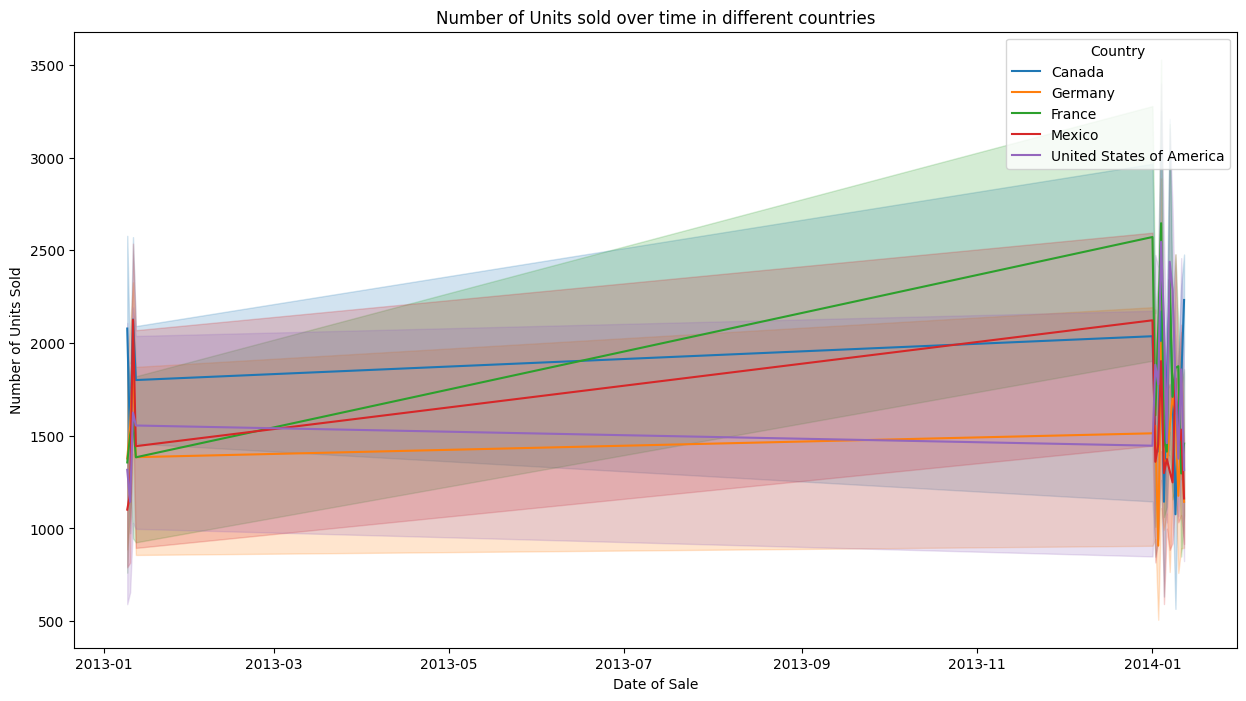

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x= df['Date'], y= df['Units Sold'], hue= df['Country'])
plt.xlabel('Date of Sale')
plt.ylabel('Number of Units Sold')
plt.title('Number of Units sold over time in different countries')
plt.show()


### From the above plot, we can see that the sales has risen significantly over time in France, clocking the highest unit sales by the end of the time period captured by our dataset.
### Sales have also risen in Mexico, albeit not at the same level as in France.
### It is evident from the plot above that sales have declined in the United States of America and remained at almost the same level in Germany and Canada throughout the period of observation.

### Result: We would suggest the logistics department of our company to focus its efforts of infrastructure expansion in France and then in Mexico.

# Q2 - Which discount bands are the most popular and profitable for each of the products sold by the company?

### Importance: The product pricing department at the company wishes to optimize the allocation of discount bands across various products of the company. This can only be done by understanding which discount bands are popular and useful for different products offered by the company. If we offer discount bands which are low or no discount at all, it may make our customer turn to a competitor product, while at the same time offering deep discounts where they aren't necessary would bleed the revenue of our company and impact profitability adversely.

## --> Here we will compare the sales generated ('Units Sold') by the various products in 'Product' across the discount bands applied on it as well as the final profit generated by each product across the different discount bands to figure out which discount bands should be employed more often by the company for different products.
## We can also visualise our results by first breaking our dataframe into separate dataframes for separate products and then visualising a scatterplot for each of them.

### To do this we will first define a grouping method to group values in 'Units Sold' and 'Profit' columns respectively, according to 'Discount Band' unique values for a given dataframe (df1 here).
### Next we will create a looping function to loop through the different products in our 'product_list' to create dataframes with only the rows pertaining to these products.
### Our looping function will next print out the names of these products, print the return of both our grouping functions and also plot a scatterplot taking 'Sales' on the x-axis, 'Profit' on y and plotted points coloured as per their 'Discount Band'.
### The looping function will use the dataframes created by looping over different product names in product_list and use these dataframes as input for our 3 different output functions.



 Carretera 
  Discount Band   Units Sold
0         High   1779.909091
1          Low   1602.000000
2       Medium   1322.416667
3         None   1664.750000
  Discount Band        Profit
0         High    5367.362121
1          Low   39884.688333
2       Medium   16640.147333
3         None   32207.500000


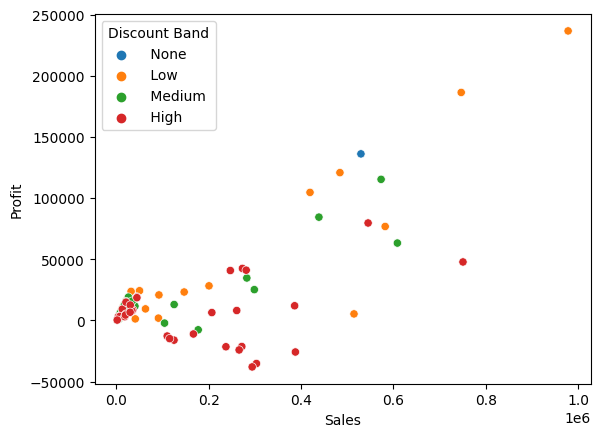

 Montana 
  Discount Band   Units Sold
0         High   1628.655172
1          Low   1681.795455
2       Medium   1683.906250
3         None   1608.250000
  Discount Band        Profit
0         High   17832.957241
1          Low   28566.443636
2       Medium   25822.058125
3         None   14283.150000


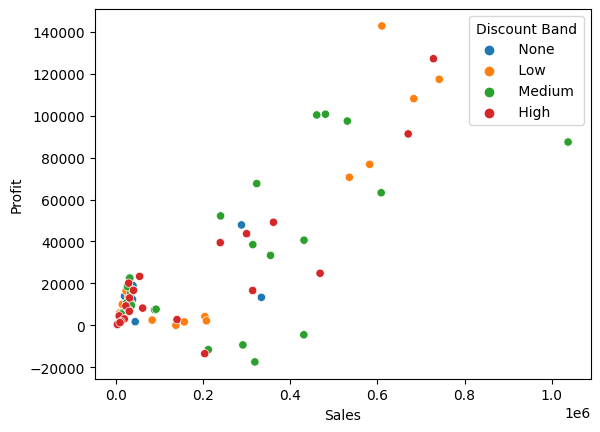

 Paseo 
  Discount Band   Units Sold
0         High   1608.463235
1          Low   1761.240741
2       Medium   1763.784615
3         None   1274.066667
  Discount Band        Profit
0         High   19132.963824
1          Low   29769.197963
2       Medium   21191.534308
3         None   34094.000000


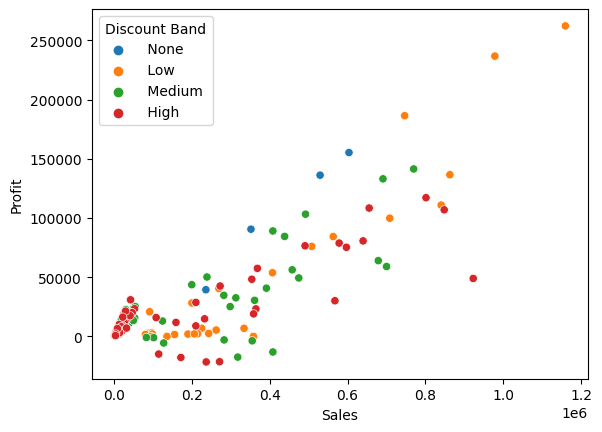

 Velo 
  Discount Band   Units Sold
0         High   1379.250000
1          Low   1723.625000
2       Medium   1462.852273
3         None   1596.428571
  Discount Band        Profit
0         High   11723.764737
1          Low   41444.299000
2       Medium   19997.123409
3         None   21675.714286


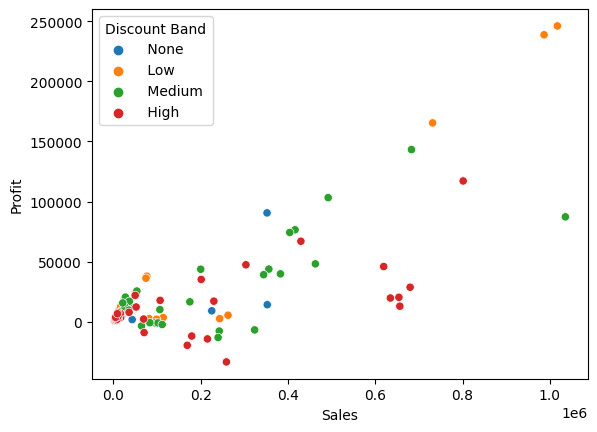

 VTT 
  Discount Band   Units Sold
0         High   1513.384615
1          Low   1405.057692
2       Medium   1617.013514
3         None   1914.285714
  Discount Band        Profit
0         High   13281.270513
1          Low   50225.307308
2       Medium   21802.931892
3         None   57724.571429


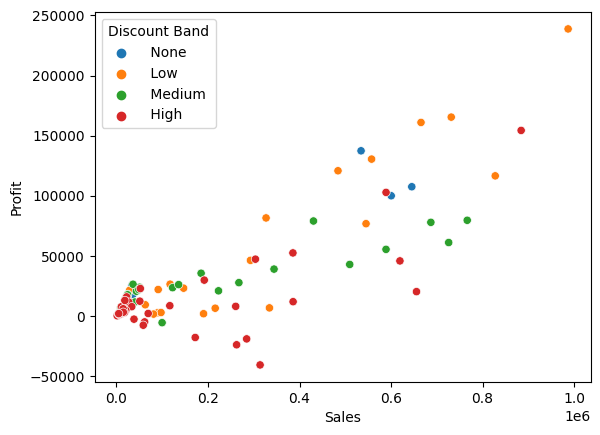

 Amarilla 
  Discount Band   Units Sold
0         High   1876.539474
1          Low   1450.000000
2       Medium   1391.176471
3         None   2050.812500
  Discount Band        Profit
0         High   11317.733684
1          Low   61491.626429
2       Medium   34999.438824
3         None   41645.812500


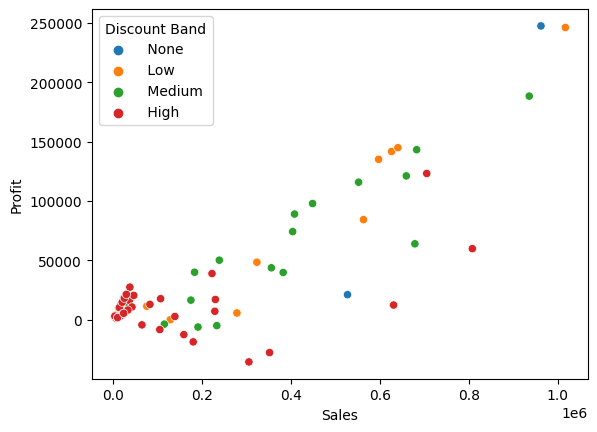

In [ ]:
def discount_units_sold(df1):
  return df1.groupby(by='Discount Band', as_index=False)['Units Sold'].mean()
def discount_profit(df1):
  return df1.groupby(by='Discount Band', as_index=False)['Profit'].mean()

for p in product_list:
  df1 = df[df['Product'] == p]
  print(p)
  print(discount_units_sold(df1))
  print(discount_profit(df1))
  sns.scatterplot(x='Sales', y='Profit', hue='Discount Band', data=df1)
  plt.show()

### From the results of our grouping operation we can clearly see the following:
#### 1) For Product 'Carretera' 'Profit' is maximised at 'Discount Band' = 'Low' or 'None' and the 'Units Sold' remain roughly the same. We suggest the company to employ 'Low' or 'None' discount bands for this product.
#### 2) For Product 'Montana' 'Profit' is maximised at 'Discount Band' = 'Low' or 'Medium' and the 'Units Sold' remain roughly the same. We suggest the company to employ 'Low' or 'Medium' discount bands for this product.
#### 3) For Product 'Paseo' 'Profit' is maximised at 'Discount Band' = 'Low' or 'None' however, 'Units Sold' is significantly lower at 'None' compared to 'Low' 'Discount Band'. We suggest the company to employ 'Low' discount band for this product.
#### 4) For Product 'Velo' both 'Profit' and the 'Units Sold' is maximised at 'Discount Band' = 'Low'. We suggest the company to employ 'Low' discount band for this product.
#### 5) For Product 'VTT' 'Profit' is maximised at 'Discount Band' = 'Low' or 'None' however, 'Units Sold' is significantly higher at 'None' compared to 'Low' 'Discount Band'. We suggest the company to employ 'None' discount band for this product.
#### 6) For Product 'Amarilla' 'Profit' is maximised at 'Discount Band' = 'Low' and 'None' band is a distant second however, 'Units Sold' is significantly higher at 'None' compared to 'Low' 'Discount Band'. We suggest the company to employ 'Low' or 'None' discount bands for this product as profits both the bands offset their poor performance on one metric by a good performance on the other.

# Q3 - Which market segments are the most profitable?

## Importance: The marketing team of the company wants to know which market segments (from column 'Segment') are the most profitable in order to launch a targetted campaign to yield the best results in terms of revenue and profit maximisation.

## --> Here we will compare the average profits earned by the company in various market segments so that the marketing team can try to expand their advantage in the 'Segment' which is the most profitable and would yield the best results.
### We will use a grouping function, similar to the one we used previously to answer Q1, this time we will use 'Segment' as  our grouping categorical variable, 'Profit' as the column grouped over and find mean for the resultant grouping.

In [ ]:
profit_segments = df.groupby(by='Segment', as_index=False)['Profit'].mean()
print(profit_segments)

            Segment        Profit
0  Channel Partners  13168.031400
1        Enterprise  -6145.456200
2        Government  37960.577267
3         Midmarket   6601.030900
4    Small Business  41431.685000


## As we can see from above, 'Government' and 'Small Business' segments are the most profitable for the company. Whereas the 'Enterprise' segment seems to be making average losses.
## We can also analyse segment wise 'Units Sold' to understand where there might be a significant potential for capturing market and enhancing revenues.
### We will do this with a grouping function, with 'Profit' as the column grouped over and find aggregate for the resultant grouping.

In [ ]:
us_segments = df.groupby(by='Segment', as_index=False)['Units Sold'].sum()
print(us_segments)

            Segment  Units Sold
0  Channel Partners    161263.5
1        Enterprise    168552.0
2        Government    470673.5
3         Midmarket    172178.0
4    Small Business    153139.0


## We can evidently see again that the 'Small Business' segment has lower number of unit sales compared to other segments.

## Finally, we can visualise our results by mapping them on a scatterplot and coloring the scatter points on the basis of the 'Segment' that instance belongs to, using 'Units Sold' on x-axis and 'Profit' on y.

<Axes: xlabel='Units Sold', ylabel='Profit'>

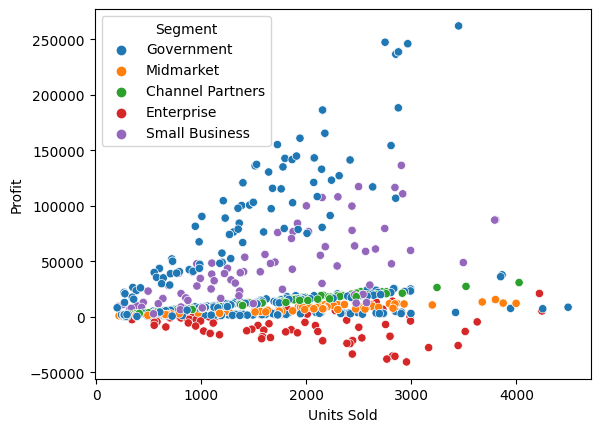

In [ ]:
sns.scatterplot(x='Units Sold', y='Profit', hue='Segment', data=df)

## As we can see above, the instances for 'Government' and 'Small Business' segments are generally tending to be on the right top quadrant of our graph, where both 'Units Sold' and 'Profit' are high.

## Result: We recommend our company to focus the efforts of the marketting team towards 'Small Business' segment customers. We can see fro our three pronged analysis that 'Small Business' returns better average profits on sales to the company and it has the smallest share of all segments in the number of units sold.

# Q4 - Which month/ months generated the most amount of sales in the previous years?

## Importance: The Human Resource department at our company wants to know which months have generated the most sales in the previous years so that it can prepare in advance for hiring temporary workforce to aid the production, sales and logistics departments during these months. Not preparing in advance may lead to the company facing a shortage of workforce during peak production time and may even lead to the company to pay overboard to hire temporary workforce too late or comparatively higher overtime rates to regular employees for working extra.

## --> Here we will compare the 'Units Sold' in different months ('Month Name') and see which months have the highest sales activity.
### We will use a grouping function, similar to the one we used previously, this time we will use 'Month Name' as  our grouping categorical variable, 'Units Sold' as the column grouped over and find aggregate for the resultant grouping.

In [ ]:
month_sales = df.groupby(by='Month Name', as_index=False)['Units Sold'].sum()
print(month_sales)

     Month Name  Units Sold
0        April      78886.5
1       August      60705.0
2     December     155306.0
3     February      55115.0
4      January      67835.5
5         July      69349.0
6         June     103302.0
7        March      53420.0
8          May      51771.0
9     November     121131.0
10     October     201104.0
11   September     107881.0


## From the above, it becomes evident that the sales reaches its peak during the month of 'October', with 'December' being the second busiest month for the company. Comparatively the months of 'February', 'March' and 'May' remain significantly inactive.

## Finally, we can visualise our results by mapping them on a bar plot with 'Month Name' on x-axis and 'Units Sold' on the y-axis:

<Axes: title={'center': 'Number of units sold every month'}, xlabel='Month Name'>

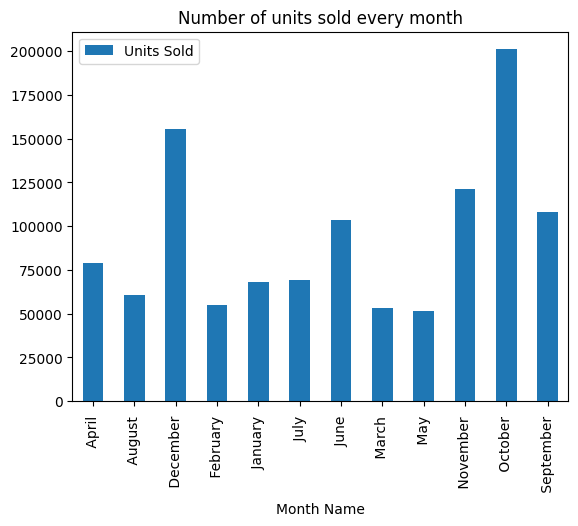

In [ ]:
month_sales.plot(kind='bar', x='Month Name', y='Units Sold', title="Number of units sold every month")

## Result: We recommend the company's human resource department to prepare temporary workforce in all sales related departments in advance to meet the demand in months 'October' through to 'December'.

# Q5 - Find out the best market segment and country for selling the different products in the company's product range?

## Importance: The company wishes to expand product lines strategically, by choosing to expand only in countries and segments where maximum value can be extracted based on a proven track record of product performance in the past. For this, the strategic management of our company wants to know the least and most optimum combinations of country and market segment where a product can be sold.

## --> Here we will compare aggregate profits ('Profit' column) over the grid of unique values in 'Country' and average profits over the grid of unique values in 'Segment', for each product respectively, to determine the least and most optimum combination for all products. As we have already seen previously, 'Units Sold' across segments varies widely and this will have an impact on the aggregate profits across different market segments ('Segment' column), therefore we have chosen to use average profits to compare market segments for each product ('Product' column). 'Units Sold' across different countries ('Country' column) remain roughly the same, so we have decided to compare the aggregate profits derived from different countries for each of our products('Product' column).

### To do this we will take a similar approach to the one we took for answering Q2; first we define a grouping method to group values in 'Profit' column according to 'Country' and 'Segment' unique values respectively, for a given dataframe (df3 here).
### Next we will create a looping function to loop through the different products in our 'product_list' to create dataframes with only the rows pertaining to these products.
### Our looping function will next print out the names of these products, print the return of both our grouping functions and also plot a scatterplot taking 'Country' on the x-axis, 'Profit' on y and plotted points coloured as per their 'Segment'.
### The looping function will use the dataframes created by looping over different product names in product_list and use these dataframes as input for our 3 different output functions.


 Carretera 
                    Country     Profit
0                    Canada  436105.34
1                    France  388864.90
2                   Germany  369674.68
3                    Mexico  393668.42
4  United States of America  238491.55
            Segment        Profit
0  Channel Partners  11578.093333
1        Enterprise -14847.458000
2        Government  38860.946667
3         Midmarket   7842.083333
4    Small Business  29001.000000


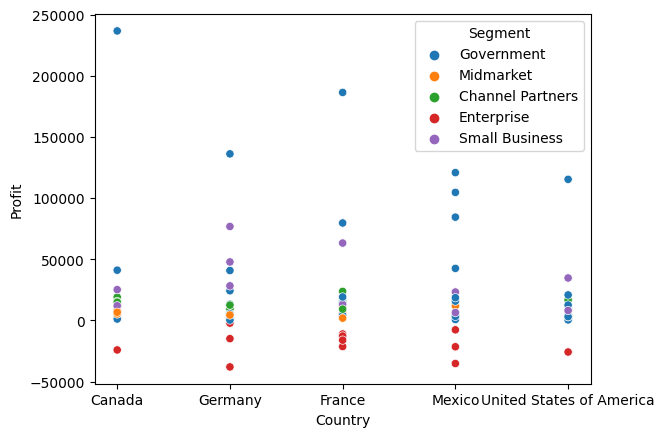

 Montana 
                    Country     Profit
0                    Canada  321867.03
1                    France  461238.37
2                   Germany  559438.37
3                    Mexico  337689.31
4  United States of America  434521.80
            Segment        Profit
0  Channel Partners  16038.130000
1        Enterprise  -2591.354167
2        Government  26814.310000
3         Midmarket   6989.920833
4    Small Business  49554.233333


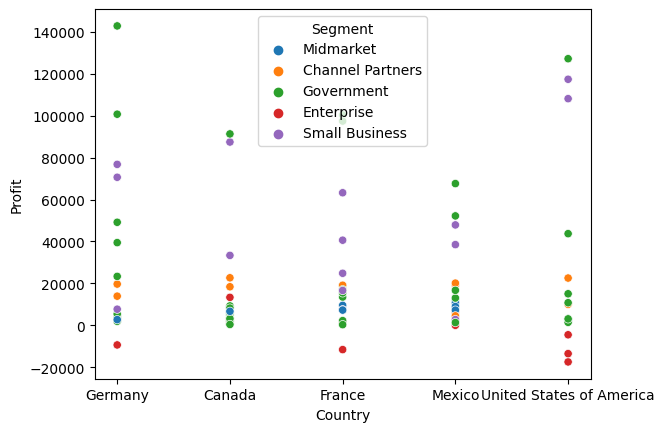

 Paseo 
                    Country      Profit
0                    Canada  1265017.99
1                    France   838748.56
2                   Germany   744416.74
3                    Mexico   928651.39
4  United States of America  1020603.28
            Segment        Profit
0  Channel Partners  12763.015385
1        Enterprise  -3143.846154
2        Government  34741.939886
3         Midmarket   7187.204167
4    Small Business  47358.057692


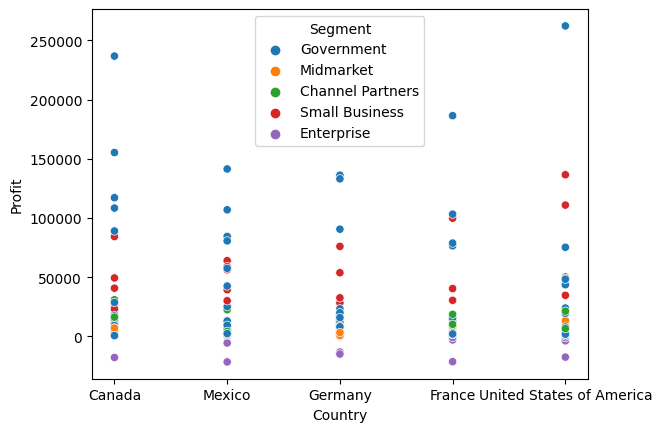

 Velo 
                    Country     Profit
0                    Canada  370568.34
1                    France  707930.24
2                   Germany  788789.00
3                    Mexico  173303.89
4  United States of America  265401.00
            Segment        Profit
0  Channel Partners   9590.502857
1        Enterprise  -4036.309524
2        Government  38189.827174
3         Midmarket   4903.812857
4    Small Business  30793.035714


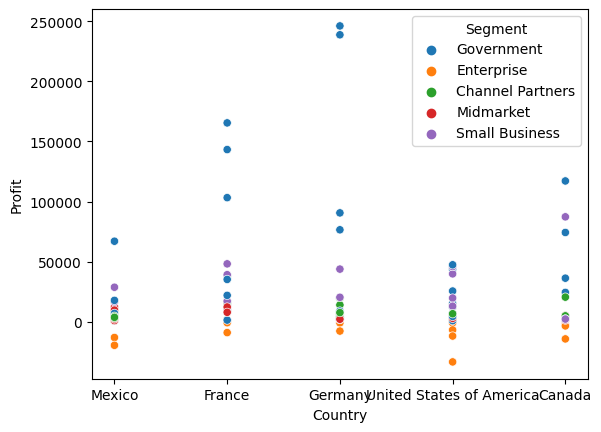

 VTT 
                    Country     Profit
0                    Canada  488808.81
1                    France  716371.09
2                   Germany  605932.77
3                    Mexico  575598.71
4  United States of America  647896.64
            Segment        Profit
0  Channel Partners  15697.568571
1        Enterprise  -7077.321429
2        Government  40014.211087
3         Midmarket   6508.632143
4    Small Business  46769.047619


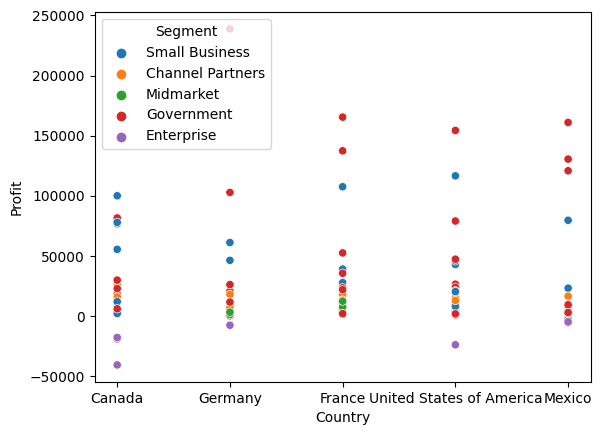

 Amarilla 
                    Country     Profit
0                    Canada  646861.38
1                    France  667867.63
2                   Germany  612137.26
3                    Mexico  498611.39
4  United States of America  388626.41
            Segment        Profit
0  Channel Partners  14379.281250
1        Enterprise  -7929.375000
2        Government  52578.609762
3         Midmarket   5300.455000
4    Small Business  33940.083333


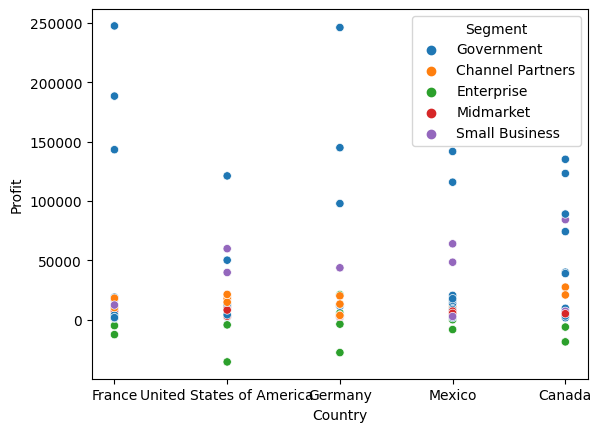

In [ ]:
def Product_country_profit(df3):
  return df3.groupby(by = 'Country', as_index=False)['Profit'].sum()
def Product_segment_profit(df3):
  return df3.groupby(by='Segment', as_index=False)['Profit'].mean()


for p in product_list:
  df3 = df[df['Product'] == p]
  print(p)
  print(Product_country_profit(df3))
  print(Product_segment_profit(df3))
  sns.scatterplot(x='Country', y='Profit', hue='Segment', data=df3)
  plt.show()

## From the above, we can draw the following inferences:
### 1) For product 'Carretera' aggregate profits are maximised in 'Canada' with 'Mexico', 'France' and 'Germany' closely following behind, the aggregate profits are the worst by a large margin in 'United States of America' for this prouct. The average profits are maximised in 'Government' market segment with 'Small Business' following closely behind. We recommend that the company should definitely not look to expand this product in 'United States of America'.
### 2) For product 'Montana'  aggregate profits are maximised in 'Germany' with 'France' and 'United States of America' closely following behind. The average profits are maximised in 'Small Business' market segment. We recommend that any product line expansions or innovations be introduced in 'Germany', 'France' and 'United States of America' and in the 'Small Business' market segment.
### 3) For product 'Paseo' aggregate profits are maximised in 'Canada' with 'United States of America' and 'Mexico' a distant second and third, 'Germany' has performed the worst in this product category. The average profits are maximised in 'Small Business' market segment with 'Government' a distant second. We recommend that any product line expansions will be well received in the country of 'Canada' and 'Small Business' market segment.
### 4) For product 'Velo' aggregate profits are maximised in 'Germany' with 'France' closely following behind, the aggregate profits are the worst in 'Mexico' for this prouct. The average profits are maximised in 'Government' market segment with 'Small Business' following closely behind. We recommend that any product line expansions be carried out in the countries of 'Germany' or 'France' and in the 'Government' or 'Small Business' market segment.
### 5) For product 'VTT' aggregate profits are maximised in 'France' with 'United States of America' and 'Germany' closely following behind in second and third, the aggregate profits are the worst in 'Canada' for this prouct. The average profits are maximised in 'Small Business' market segment with 'Government' following closely behind. We recommend that any product line expansions be carried out in the countries of 'France', 'United States of America' or 'Germany' and in the 'Government' or 'Small Business' market segment.
### 6) For product 'Amarilla' aggregate profits are maximised in 'France' with 'Canada' and 'Germany' closely following behind in second and third, the aggregate profits are the worst in 'United States of America' for this prouct. The average profits are maximised in 'Government' market segment for this product. We recommend that the company should definitely not look to expand this product in 'United States of America' and should choose 'Government' market segment for any future expansions.
### 7) The market segment 'Enterprise' has performed badly in average profits over the entire line of products, giving losses for the entire product range of the company. Therefore, we recomend the company to re-evaluate the resources it has dedicated to developing this segment and not introduce any new product lines in it.

# 6) What is the impact of overhead costs on the profit margin of the company's product line across different market segments and countries?
## Importance: Overhead costs are costs that are added to the product in the process of making a sale after its manufacturing has been completed, these may include costs of advertising, logistics, intermediary costs etc., we will not consider the discounts offered in the overhead costs here as we have already covered them separately. These costs can become significant stumbling blocks for the growth and profitability of any manufacturing enterprise that strives to cater to different market segments and countries.

## --> Here, we will compare overhead costs with the pre sale profit margins (Sale Price - Manufacturing Price).
## It is important to note here that we will need to add extra columns in order to move forward with our analysis here as the dataset doesn't contain any columns for overhead costs or pre sale profit margins. We will do the same by creating a 'Margin' column by deducting row wise values of 'Manufacturing Price' from 'Sale Price' columns.
## Next, we will multiply the row wise values of columns 'Manufacturing Price' and 'Units Sold' to create a column of 'Cost of Production'; we will then deduct row wise, the values of 'Cost of Production' column from 'COGS' column to create a 'Sales Overheads' column.

In [ ]:
df['Margin'] = df['Sale Price'] - df['Manufacturing Price']
df['Cost of Production'] = df['Manufacturing Price'] * df['Units Sold']
df['Sales Overheads'] = df['COGS'] - df['Cost of Production']
df['Overhead Cost'] = df['Sales Overheads'] / df['Units Sold']
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Margin,Cost of Production,Sales Overheads,Overhead Cost
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,17.0,4855.5,11329.5,7.0
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014,17.0,3963.0,9247.0,7.0
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-01-06,6,June,2014,12.0,6534.0,15246.0,7.0
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-01-06,6,June,2014,12.0,2664.0,6216.0,7.0
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-01-06,6,June,2014,12.0,7410.0,17290.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03,3,March,2014,40.0,643500.0,-24750.0,-10.0
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10,10,October,2014,40.0,141960.0,-5460.0,-10.0
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02,2,February,2014,2.0,6840.0,0.0,0.0
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04,4,April,2014,-3.0,7230.0,-3615.0,-5.0


### We can see from the representation of our modified dataframe that in some instances, the 'Margin' column and the 'Overhead Cost' column gives us negative values.
### The negative 'Overhead Cost' may be because of the company holding and making a sale on some old stock of the product whose manufacturing price may have been lower in the past, thus making the 'COGS' lower than 'Cost of Production' for that particular sale and giving us a negative 'Sales Overheads' and subsequently 'Overhead Cost'.
### The reasons for a negative margin may be that the company has booked a sale on the basis of a contract entered on selling price set in the past and not reflective of the current manufacturing price, the company may not have changed selling price on this contract as it would have used the old inventory to fulfill this contract. We can see this evidently from rows number 698 and 699 where both 'Margin' and 'Overhead Cost' are negative.
### Alternatively, the selling price may have been kept low due to low demand and a stockpile of old inventory that needs to be cleared, in such cases the company would rather make a loss on the product than incur the cost of warehousing it over long periods with risks of the product becoming unusable or redundant in the future.
### We will leave these values as it is for further analysis.

## We will now proceed with our analysis.
### To do this we will first define a grouping method to group values in 'Margin' and 'Overhead Cost' columns respectively, according to 'Country' unique values for a given dataframe (df1 here).
### Next we will create a looping function to loop through the different market segments in our 'market_segments_list' to create dataframes with only the rows pertaining to these products.
### Our looping function will next print out the names of these market segments, print the return of both our grouping functions and also plot a scatterplot taking 'Overhead Cost' on the x-axis, 'Margin' on y and plotted points coloured as per their 'Product'.
### The looping function will use the dataframes created by looping over different product names in product_list and use these dataframes as input for our 3 different output functions.

Government
                    Country     Margin
0                    Canada  28.866667
1                    France  23.450000
2                   Germany  35.683333
3                    Mexico  27.183333
4  United States of America  27.516667
                    Country  Overhead Cost
0                    Canada      -5.133333
1                    France     -10.550000
2                   Germany       1.683333
3                    Mexico      -6.816667
4  United States of America      -6.483333


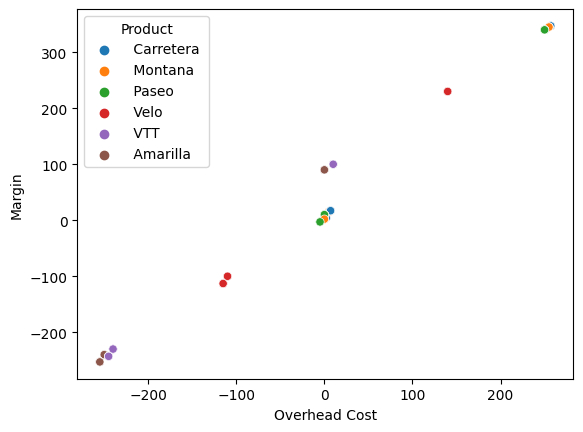

Midmarket
                    Country  Margin
0                    Canada   -53.1
1                    France   -77.8
2                   Germany   -88.8
3                    Mexico   -64.3
4  United States of America   -78.8
                    Country  Overhead Cost
0                    Canada          -58.1
1                    France          -82.8
2                   Germany          -93.8
3                    Mexico          -69.3
4  United States of America          -83.8


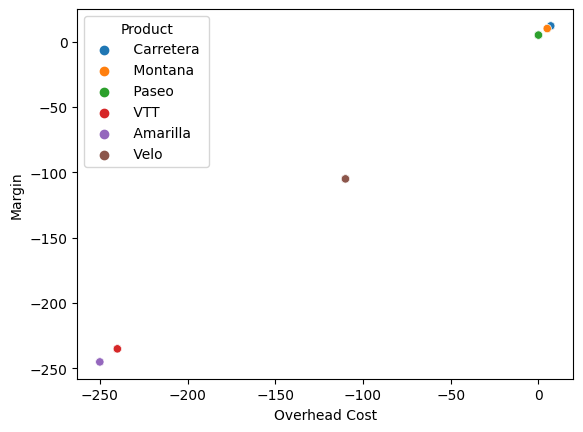

Channel Partners
                    Country  Margin
0                    Canada  -55.40
1                    France  -92.95
2                   Germany -103.95
3                    Mexico  -79.45
4  United States of America  -93.95
                    Country  Overhead Cost
0                    Canada         -64.40
1                    France        -101.95
2                   Germany        -112.95
3                    Mexico         -88.45
4  United States of America        -102.95


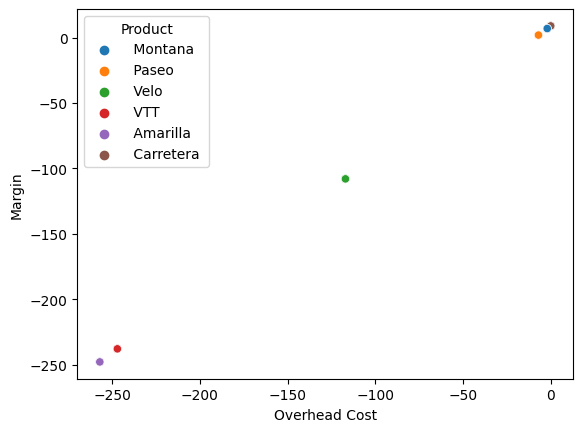

Enterprise
                    Country  Margin
0                    Canada   10.20
1                    France   51.75
2                   Germany   26.05
3                    Mexico   27.05
4  United States of America   34.70
                    Country  Overhead Cost
0                    Canada           5.20
1                    France          46.75
2                   Germany          21.05
3                    Mexico          22.05
4  United States of America          29.70


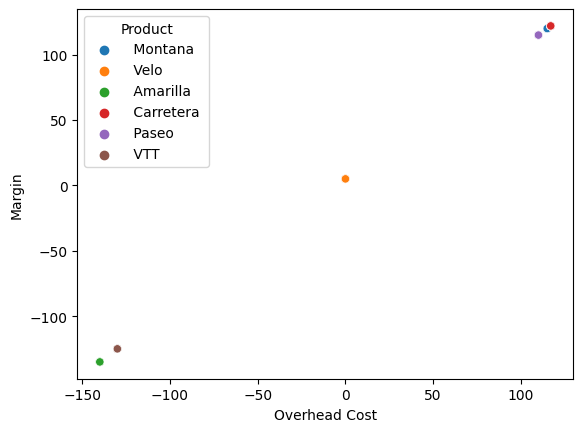

Small Business
                    Country  Margin
0                    Canada  183.20
1                    France  208.95
2                   Germany  220.15
3                    Mexico  194.45
4  United States of America  172.20
                    Country  Overhead Cost
0                    Canada         133.20
1                    France         158.95
2                   Germany         170.15
3                    Mexico         144.45
4  United States of America         122.20


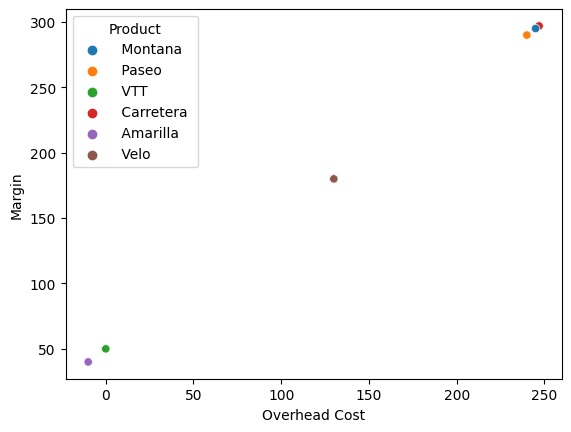

In [ ]:
def Segment_country_margin(df4):
  return df4.groupby(by = 'Country', as_index=False)['Margin'].mean()
def Segment_country_oh(df4):
  return df4.groupby(by='Country', as_index=False)['Overhead Cost'].mean()


for ms in market_segments_list:
  df4 = df[df['Segment'] == ms]
  print(ms)
  print(Segment_country_margin(df4))
  print(Segment_country_oh(df4))
  sns.scatterplot(x='Overhead Cost', y='Margin', hue='Product', data=df4)
  plt.show()

## From the above, we can draw the following inferences:
### 1) In the 'Government' segment, 'Germany' provides us with the highest average margin and 'France' with the lowest. 'Overhead Cost' for all countries remain negative, except 'Germany', this points towards inventory build up due to lower sales than forecasted in previous periods.
### 2) In the 'Midmarket' segment, all the countries show a negative margin, which might be indicative of a lot of old inventory in the stockpile for products sold to this segment of customers. 'Overhead Cost' for all countries remain negative, again strengthening our inference that there may be an inventory pile up which is being reflected in the sales of this segment.
### 3) In the 'Channel Partners' segment, all the countries show a negative margin, which might be indicative of a lot of old inventory in the stockpile for products sold to this segment of customers. 'Overhead Cost' for all countries remain negative, again strengthening our inference that there may be an inventory pile up which is being reflected in the sales of this segment.
### 4) In the 'Enterprise' segment, 'France' provides us with the highest average margin and 'Canada' with the lowest. 'Overhead Cost' are again highest for 'France' and lowest for 'Canada'. This shows that the company's product pricing has been apt for this segment across all countries.
### 5) In the 'Small Business' segment, 'Germany' provides us with the highest average margin and 'United States of America' with the lowest. 'Overhead Cost' are similarly highest for 'Germany' and lowest for 'United States of America'. This shows that the company's product pricing has been apt for this segment across all countries.
### 6) We can also see from our visualisations that 'Margin' rises as the 'Overhead Cost' rise for each segment, this shows that the company's pricing policy has been apt and covering the costs in a comprehensive manner.

## Result: We recommend the company to improve upon its segment sales forecast in order to avoid inventory build up for the segments - 'Government', 'Midmarket' and 'Channel Partners'.
## For the 'Midmarket' and 'Channel Partners' segments, we also recommend the company to look into the contracts entered and account for contracted sales in the period in which the contract has been entered so as to not create a mismatch in pricing and costing information pertaining to two different periods and leading to false negative margins being reported when there has been an actual profit.
## We find that the overall product pricing of the company has been proper and covering the overhead costs effectively.

# Discussion:



## Strengths of Analysis:
### 1) Our analysis covers all aspects of the data thoroughly and gives specific and targeted inferences in order to enable comprehensive decision making in all departments of the company.
### 2) The analysis is simplified, uses visualisations and simple arithmetic concepts such as mean and aggregates which enhances its explainability to an audience of company employees and upper management, which may or may not be very well versed with statistical concepts or data analysis.
### 3) Our dataset covers the basic heirarchical flow of a manufacturing enterprise well without giving added complexities. For a preliminary analysis, the dataset is very useful and can provide the basis for further in-depth analysis into various aspects of production and sales in our enterprise.

## Weaknesses of Analysis:
### 1) Our analysis doesn't cover certain basic analytic outputs such as profit or sales growth over time in favour of saving time and keeping the report short. The analysis covers specific business questions and problems which we have assumed to be the focus of our company.
### 2) The analysis isn't supported by strong statistical tests for accuracy and significance, these were looked over in favour of a simplified and easy to understand analysis which could be performed by data analysts with limited experience or domain knowledge as well.
### 3) Our dataset is relatively small and may not present a complete and comprehensive picture, the dataset also doesn't contain any information on inventory movements or cash flows within the company.



## Implications for the business:
### 1) Our analysis shows that the company is dealing with a bulk load of stockpiled inventory which has been moved in the period that our dataset covers. The company should employ sales tactics to rid itself of this stockpile and maintain its inventory turnover ratio sufficiently across all market segments and for all countries it supplies to.
### 2) We can also see that pre sale profit margins for certain segments is negative. This is also a result of stockpiled inventory moving slower than desired but it also implies that the company has not been able to convince buyers in these segments of their product or the price point from competitors is too low, in either case the company should re-evaluate its involvement in these segments and if a different strategy and product is required.
### 3) We could also see from answering Q1 that the total sales have remained stagnant in 'Germany' and declined in the 'United States of America'. We have also seen that 'Germany' and 'United States of America' leads average profit maximisation for several products as well. The aggregate growth stagnation might have resulted from poor product mix being offered in the countries or negligent sales and marketing efforts, either situations should be remediated quickly.
### 4) The company should look into 'Discount Band' placement more strategically and follow a data driven approach in this, we could see while answering Q2 that most of the instances falling in 'Medium' or 'High' discount band grouped towards the lower left quadrant of our 'Profit - Units Sold' graph, which indicates that these discount bands didn't lead to increased sales or profits.



## Data Driven Recommendations:
### 1) We recommend that the company focus on enhancing its marketing efforts in 'Germany' as it is in the top three average profit earning countries in all but one product ('Paseo'). The stagnant growth of total sales in the country should be addressed for this reason.
### 2) We recommend the company to reduce or remove the products 'Carretera', 'Velo' and 'Amarilla' in its product line in 'United States of America' as we can see that the aggregate profits from sale of these products is much lower in the country compared to other countries. This may mean that the price point is low for these products in the country and it may make more sense to promote them in countries where profitability is higher.
### 3) The 'Units Sold' and 'Profit' for most of our products were maximised at a 'Low' discount band, we recommend that the company avoid employing a 'High' discount band for any of its products and refers to the specific recommendations for employing discount bands, as discussed while answering Q2.
### 4) We can see from our analysis that 'Small Business' returns better average profits on sales to the company and it has the smallest share of all segments in the number of units sold, which represents huge upside potential. It also became evident while answering Q6 that 'Small Business' has the highest 'Margins' and 'Overhead Cost' of all the different segments, a clever foray into expanding customer base in the segment might lead to lower overhead costs as they get spread across a larger number of customers, all the while keeping the high margins enjoyed in the segment.
### 5) From our answers to Q3 Q5 and Q6 we can see that 'Enterprise' segment has been generating losses across all product ranges however the profit margin of the segment in different countries is above overhead costs per unit. The reason for losses in the segment may be due to offering of high discounts or wrong product placement in the segment and the company should evaluate its sales performance in the segment to decide whether to continue and what pricing and marketing strategy to introduce in the segment.
### 6) We also recommend the company's human resource department to prepare recruitment of temporary workforce for the months from 'October' to 'December' in order to meet the high demand anticipated in the months. The company may also employ extra hands on a temporary basis in production for the products that have relatively low inventory turnover (time taken to sell a manufactured good).